## EIA Monthly Electric Grid Data - Generation Capacity
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [99]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'gencap.csv'

gencap = pd.read_csv(csv_path, low_memory=False)
gencap.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(1399416, 28)

In [100]:
gencap = gencap.drop_duplicates()
gencap.shape

(1284600, 28)

In [101]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284600 entries, 0 to 1399415
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   period                        1284590 non-null  object 
 1   stateid                       1284600 non-null  object 
 2   stateName                     1284600 non-null  object 
 3   sector                        1284600 non-null  object 
 4   sectorName                    1284600 non-null  object 
 5   entityid                      1284600 non-null  object 
 6   entityName                    1284438 non-null  object 
 7   plantid                       1284545 non-null  object 
 8   plantName                     1284545 non-null  object 
 9   generatorid                   1284545 non-null  object 
 10  technology                    1284545 non-null  object 
 11  energy_source_code            1284545 non-null  object 
 12  energy-source-desc            128

In [102]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate-capacity-mw,net-summer-capacity-mw,net-winter-capacity-mw,unit,nameplate-capacity-mw-units,net-summer-capacity-mw-units,net-winter-capacity-mw-units
0,2022-12,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.8014,-77.1288,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [103]:
gencap.columns = gencap.columns.str.replace('-', '_')
gencap['period'] = pd.to_datetime(gencap['period'], yearfirst=True, errors='coerce')
gencap['nameplate_capacity_mw'] = pd.to_numeric(gencap['nameplate_capacity_mw'], errors='coerce')
gencap['plantid'] = 'P' + gencap['plantid'].astype(str)


In [104]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284600 entries, 0 to 1399415
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   period                        1284590 non-null  datetime64[ns]
 1   stateid                       1284600 non-null  object        
 2   stateName                     1284600 non-null  object        
 3   sector                        1284600 non-null  object        
 4   sectorName                    1284600 non-null  object        
 5   entityid                      1284600 non-null  object        
 6   entityName                    1284438 non-null  object        
 7   plantid                       1284600 non-null  object        
 8   plantName                     1284545 non-null  object        
 9   generatorid                   1284545 non-null  object        
 10  technology                    1284545 non-null  object        
 11  ene

In [125]:
e_src = gencap[['energy_source_code', 'energy_source_desc']]
e_src.drop_duplicates()

,energy_source_code,energy_source_desc
0,MSW,Municipal Solid Waste (All)
1,SUN,Solar
24,DFO,Disillate Fuel Oil
33,WND,Wind
44,NG,Natural Gas
55,LFG,Landfill Gas
62,WH,Waste Heat
149,SUB,Subbituminous Coal
150,WAT,Water
192,MWH,Electricity used for energy storage


In [114]:
e_src.shape

(1284600, 2)

In [121]:
e_src = e_src.drop_duplicates().dropna().set_index('energy_source_code').transpose()
e_src

energy_source_code,MSW,SUN,DFO,WND,NG,LFG,WH,SUB,WAT,MWH,...,LIG,OBL,BFG,WDL,PG,Operating,SGC,SGP,OBS,TDF
energy_source_desc,Municipal Solid Waste (All),Solar,Disillate Fuel Oil,Wind,Natural Gas,Landfill Gas,Waste Heat,Subbituminous Coal,Water,Electricity used for energy storage,...,Lignite,Other Biomass Liquids,Blast-Furnace Gas,Wood Waste Liquids,Gaseous Propane,Brevard,Coal-Derived Synthesis Gas,Synthesis Gas from Petroleum Coke,Other Biomass Solids,Tire-Derived Fuel


In [124]:
print(e_src)

energy_source_code                          MSW    SUN                 DFO   
energy_source_desc  Municipal Solid Waste (All)  Solar  Disillate Fuel Oil  \

energy_source_code   WND           NG           LFG          WH   
energy_source_desc  Wind  Natural Gas  Landfill Gas  Waste Heat  \

energy_source_code                 SUB    WAT   
energy_source_desc  Subbituminous Coal  Water  \

energy_source_code                                  MWH  ...      LIG   
energy_source_desc  Electricity used for energy storage  ...  Lignite  \

energy_source_code                     OBL                BFG   
energy_source_desc  Other Biomass Liquids   Blast-Furnace Gas  \

energy_source_code                 WDL               PG Operating   
energy_source_desc  Wood Waste Liquids  Gaseous Propane   Brevard  \

energy_source_code                         SGC   
energy_source_desc  Coal-Derived Synthesis Gas  \

energy_source_code                                SGP                   OBS   
energy_sourc

In [122]:
e_src_dict = e_src.to_dict()
print(e_src_dict)

{'MSW': {'energy_source_desc': 'Municipal Solid Waste (All)'}, 'SUN': {'energy_source_desc': 'Solar'}, 'DFO': {'energy_source_desc': 'Disillate Fuel Oil'}, 'WND': {'energy_source_desc': 'Wind'}, 'NG': {'energy_source_desc': 'Natural Gas'}, 'LFG': {'energy_source_desc': 'Landfill Gas'}, 'WH': {'energy_source_desc': 'Waste Heat'}, 'SUB': {'energy_source_desc': 'Subbituminous Coal'}, 'WAT': {'energy_source_desc': 'Water'}, 'MWH': {'energy_source_desc': 'Electricity used for energy storage'}, 'BIT': {'energy_source_desc': 'Bituminous Coal'}, 'RFO': {'energy_source_desc': 'Residual Fuel Oil'}, 'RC': {'energy_source_desc': 'Refined Coal'}, 'OG': {'energy_source_desc': 'Other Gas'}, 'OBG': {'energy_source_desc': 'Other Biomass Gases '}, 'WDS': {'energy_source_desc': 'Wood Waste Solids'}, 'GEO': {'energy_source_desc': 'Geothermal'}, 'BLQ': {'energy_source_desc': 'Black Liquor'}, 'JF': {'energy_source_desc': 'Jet Fuel'}, 'PC': {'energy_source_desc': 'Petroleum Coke'}, 'OTH': {'energy_source_des

In [123]:
import json
e_src_dict_fname = 'e_src_dict.json'
with open(e_src_dict_fname, "w") as outfile:
    json.dump(e_src_dict, outfile, indent=4)

In [82]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate_capacity_mw,net_summer_capacity_mw,net_winter_capacity_mw,unit,nameplate_capacity_mw_units,net_summer_capacity_mw_units,net_winter_capacity_mw_units
0,2022-12-01,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,P50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.8014,-77.1288,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [83]:
gencap.describe(include=['O']).T

,count,unique,top,freq
stateid,1284600,52,CA,150663
stateName,1284600,52,California,150663
sector,1284600,12,ipp-non-chp,554564
sectorName,1284600,8,IPP Non-CHP,554564
entityid,1284600,5937,55938,21858
entityName,1284438,6059,Industrial Power Generating Company LLC,21858
plantid,1284600,12134,P1751,4179
plantName,1284545,12406,Edison Sault,4179
generatorid,1284545,8549,1,164700
technology,1284545,28,Solar Photovoltaic,234168


In [84]:
gencap.describe().T

,count,mean,min,25%,50%,75%,max,std
period,1284590,2020-05-11 12:51:29.668142592,2018-01-01 00:00:00,2019-03-01 00:00:00,2020-05-01 00:00:00,2021-07-01 00:00:00,2022-12-01 00:00:00,NaN
nameplate_capacity_mw,1284502.0,52.184997,0.1,1.5,4.7,47.5,1499.4,126.765918
net_summer_capacity_mw,1280584.0,48.079583,-3.7,1.4,4.2,42.0,1401.0,119.351928
net_winter_capacity_mw,1280007.0,49.832118,-3.7,1.3,4.3,44.0,1428.0,121.877458


<Axes: xlabel='period'>

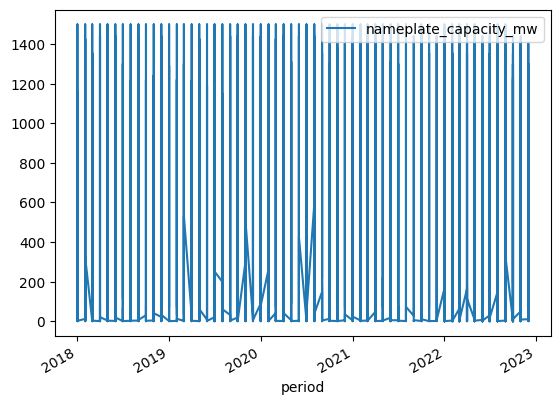

In [85]:
gencap.plot(x='period', y='nameplate_capacity_mw')

<Axes: >

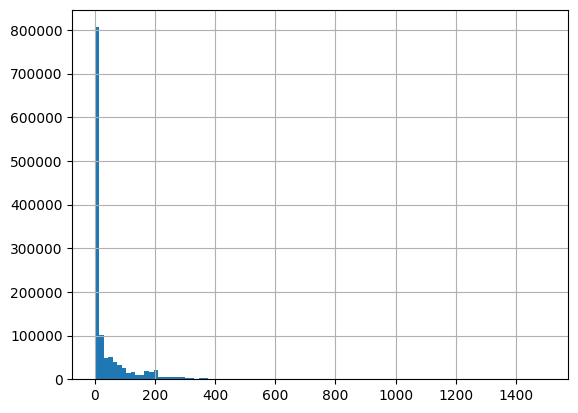

In [86]:
gencap.nameplate_capacity_mw.hist(bins=100)

In [87]:
#retain full gencap
gencap_full = gencap

In [88]:
#group by BA using gencap data
gencap['statusDescription'].unique()


array(['Operating',
       'Standby/Backup: available for service but not normally used',
       'Out of service but expected to return to service in next calendar year',
       'Out of service and NOT expected to return to service in next calendar year',
       nan, '180.0', '157.0', '156.0', '155.0'], dtype=object)

In [89]:
gencap['status'].unique()

array(['OP', 'SB', 'OA', 'OS', nan, '163.0', '163.8', '157.0', '156.0',
       '155.0'], dtype=object)

In [90]:
gencap.shape

(1284600, 28)

In [91]:
gencap = gencap[gencap.status.isin(['OP','SB'])]
gencap.shape

(1250752, 28)

In [92]:
gencap = gencap[['period','balancing_authority_code','energy_source_code','nameplate_capacity_mw']]
gencap.head()

,period,balancing_authority_code,energy_source_code,nameplate_capacity_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [93]:
gencap = gencap.rename(columns={'balancing_authority_code':'balancing_auth', 'energy_source_code':'energy_source', \
                       'nameplate_capacity_mw':'np_cap_mw'})
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [94]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [95]:
#remove non-US BAs, and larger regions
gencap = gencap[gencap.balancing_auth.isin(BA_dict.keys())]
gencap.shape

(1208762, 4)

In [96]:
gencap = gencap.groupby(['period', 'balancing_auth', 'energy_source'], as_index = False)['np_cap_mw'].aggregate('sum')
gencap.shape
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2018-01-01,AEC,BIT,538.0
1,2018-01-01,AEC,LFG,4.8
2,2018-01-01,AEC,NG,1330.0
3,2018-01-01,AEC,WAT,8.2
4,2018-01-01,AECI,DFO,103.6


In [97]:
gencap.head(20)

,period,balancing_auth,energy_source,np_cap_mw
0,2018-01-01,AEC,BIT,538.0
1,2018-01-01,AEC,LFG,4.8
2,2018-01-01,AEC,NG,1330.0
3,2018-01-01,AEC,WAT,8.2
4,2018-01-01,AECI,DFO,103.6
5,2018-01-01,AECI,LFG,4.0
6,2018-01-01,AECI,NG,3056.5
7,2018-01-01,AECI,RC,2481.7
8,2018-01-01,AECI,WAT,58.0
9,2018-01-01,AECI,WND,462.9


In [98]:
gencap.energy_source.unique()

array(['BIT', 'LFG', 'NG', 'WAT', 'DFO', 'RC', 'WND', 'BLQ', 'MSW', 'MWH',
       'WDS', 'SUB', 'SUN', 'GEO', 'NUC', 'OBG', 'WDL', 'AB', 'JF', 'OG',
       'PC', 'PG', 'PUR', 'WH', 'LIG', 'OBS', 'OTH', 'RFO', 'KER', 'BFG',
       'SGC', 'WC', 'SGP', 'OBL', 'TDF'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

etype = 'NG'
p=0
for BA in BA_dict:
    fig=plt.figure(p)
    fig.suptitle(f"{BA} {etype}")
    sns.histplot(data=BA_dict[BA][etype], x='MWh')
    plt.show()
    p += 1